In [1]:
import numpy as np
from matplotlib import pyplot as plt

from my_utils import *
from statistics_kit import *
import pandas as pd
from scipy.optimize import curve_fit


In [2]:
df = unpickle("QFM_compare_to_integral_record_data/QFM_data.pickle")
Q = df["Q"]
delta_t = df["delta_t"]
len(Q)

loading from QFM_compare_to_integral_record_data/QFM_data.pickle


170936

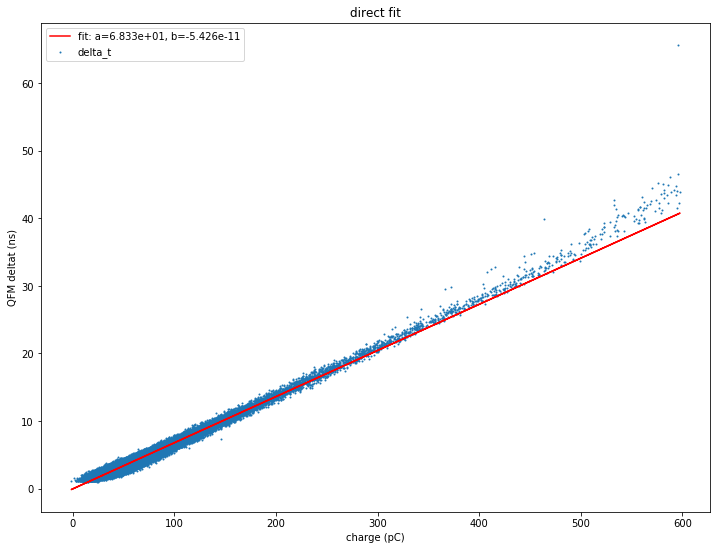

gain = 14.634 pC/ns


In [4]:

##################################################
##              direct fit of data              ##
##################################################


# no special delimiter needed for tsv
xdata = Q
ydata = delta_t

mask = xdata < 600e-12

xdata = xdata[mask]
ydata = ydata[mask]

def func(x, a, b):
    return a *x + b

popt, pcov = curve_fit(func, xdata, ydata, p0 = [1,1])

plt.scatter(xdata*1e12,ydata*1e9,s=1)
plt.title("direct fit")
plt.plot(xdata*1e12, 1e9*func(xdata, *popt), 'r-',
         label='fit: a=%3.3e, b=%3.3e' % tuple(popt))
plt.xlabel("charge (pC)")
plt.ylabel("QFM deltat (ns)")
plt.legend()
plt.show()


gain=1/popt[0] # pC/ps
gain_pC_per_ns = 1000*gain
print("gain = {:3.3f} pC/ns".format(gain_pC_per_ns))

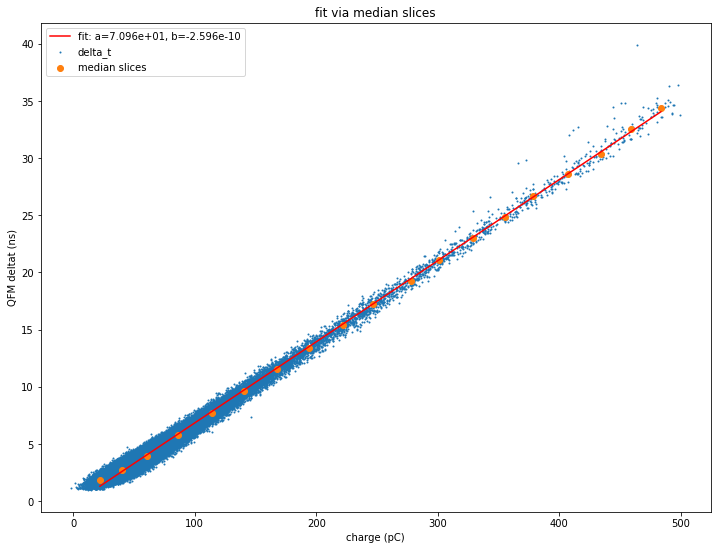

gain = 14.092 pC/ns


In [5]:
##################################################
##                median slices                 ##
##################################################

from statistics_kit import *


# no special delimiter needed for tsv
xdata = Q
ydata = delta_t

mask = xdata < 500e-12

xdata = xdata[mask]
ydata = ydata[mask]


plt.scatter(xdata*1e12,ydata*1e9,s=1)

xdata, ydata = median_slices(xdata,ydata)

plt.scatter(xdata*1e12,ydata*1e9,label="median slices")


def func(x, a, b):
    return a *x + b

popt, pcov = curve_fit(func, xdata, ydata, p0 = [1,1])

plt.title("fit via median slices")
plt.plot(xdata*1e12, 1e9*func(xdata, *popt), 'r-',
         label='fit: a=%3.3e, b=%3.3e' % tuple(popt))
plt.xlabel("charge (pC)")
plt.ylabel("QFM deltat (ns)")
plt.legend()
plt.show()


gain=1/popt[0] # pC/ps
gain_pC_per_ns = 1000*gain
print("gain = {:3.3f} pC/ns".format(gain_pC_per_ns))

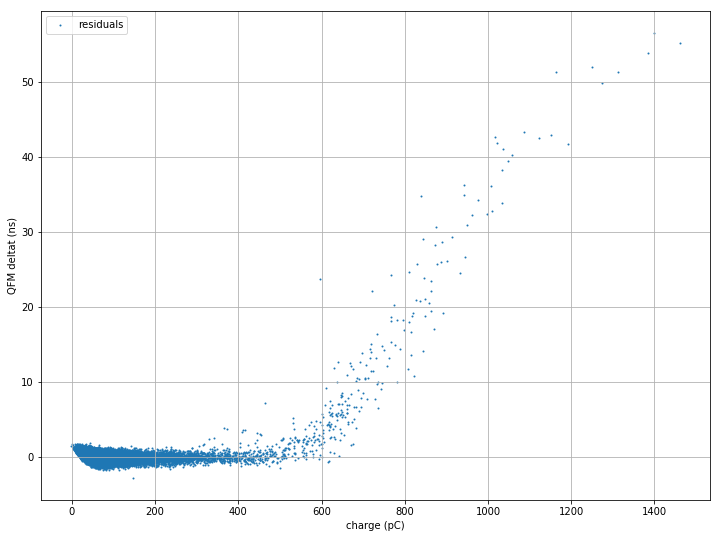

In [6]:
##################################################
##                  residuals                   ##
##################################################


xdata = Q
ydata = delta_t

plt.scatter(xdata*1e12, 1e9*( ydata- func(xdata, *popt) ), s=1,  label='residuals')
plt.xlabel("charge (pC)")
plt.ylabel("QFM deltat (ns)")
plt.legend()
plt.grid(True)
plt.show()